In [84]:
# Data manipulation library
import pandas as pd
import numpy as np
import re

# Plotting library
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves

# Scale data
from sklearn.preprocessing import StandardScaler
# Split dataset
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

In [85]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [86]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [87]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [88]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [89]:
# Dropping CustomerID column
df.drop(['CustomerID'], inplace = True, axis = 1) 
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [90]:
def trf_gender(x):
    if x == 'Male':
        return 0            # Male = 0
    if x == 'Female':
        return 1            # Female = 1
df["Gender_Transformed"] = df["Gender"].map(lambda x : trf_gender(x))

In [91]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Transformed
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [92]:
df.Gender_Transformed.unique()

array([0, 1])

In [93]:
print(df['Gender'].unique())

['Male' 'Female']


In [94]:
#Select numeric column heads
columns = list(df.select_dtypes(include = ['float64', 'int64']).columns.values)
columns

['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Transformed']

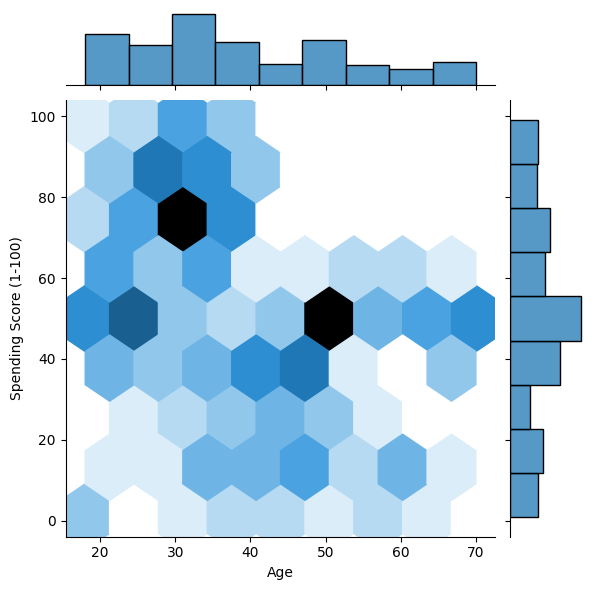

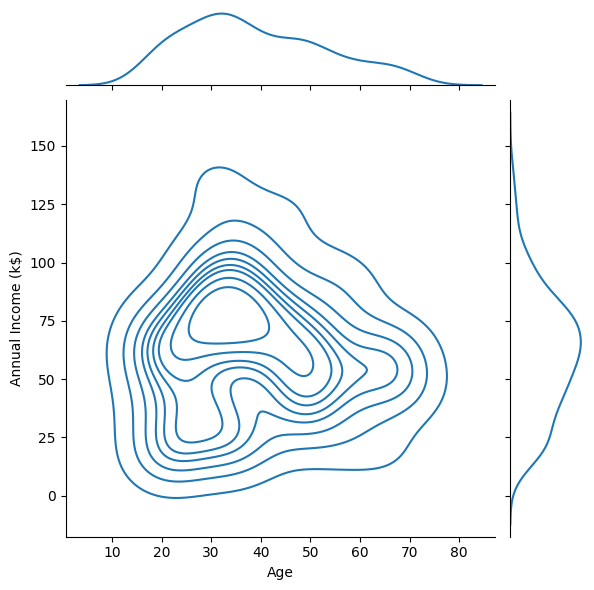

In [95]:
#sns.jointplot(x="x", y="y", data=df)
sns.jointplot(x='Age', y='Spending Score (1-100)', kind = "hex", data=df)
sns.jointplot(x='Age', y='Annual Income (k$)', kind="kde",data=df)

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

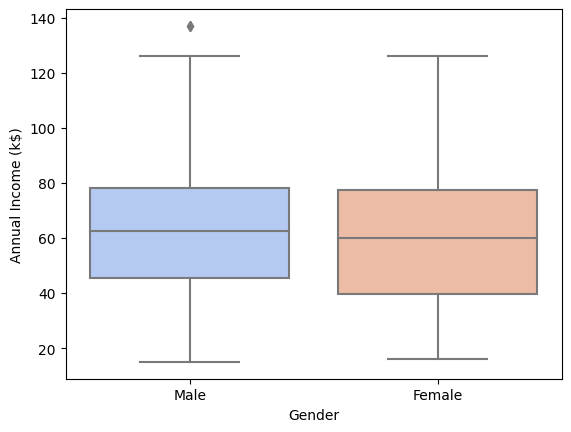

In [96]:
#box plot Gender vs Annual_Income_k
sns.boxplot(x = 'Gender', y = 'Annual Income (k$)',palette="coolwarm", data = df)

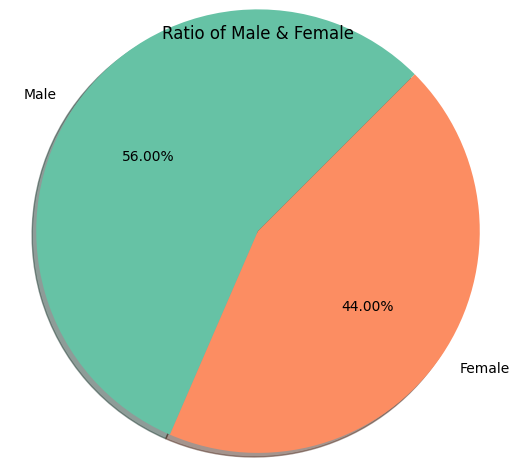

In [97]:
df.Gender.value_counts()
totalgenre = df.Gender.value_counts()
genrelabel = ['Male', 'Female']
plt.axis('equal') # For perfect circle
plt.pie(totalgenre, labels=genrelabel, radius=1.5, autopct='%0.2f%%', shadow=True, explode=[0, 0], startangle=45,colors=sns.color_palette("Set2", n_colors=len(totalgenre)))
plt.title('Ratio of Male & Female')
plt.show() 

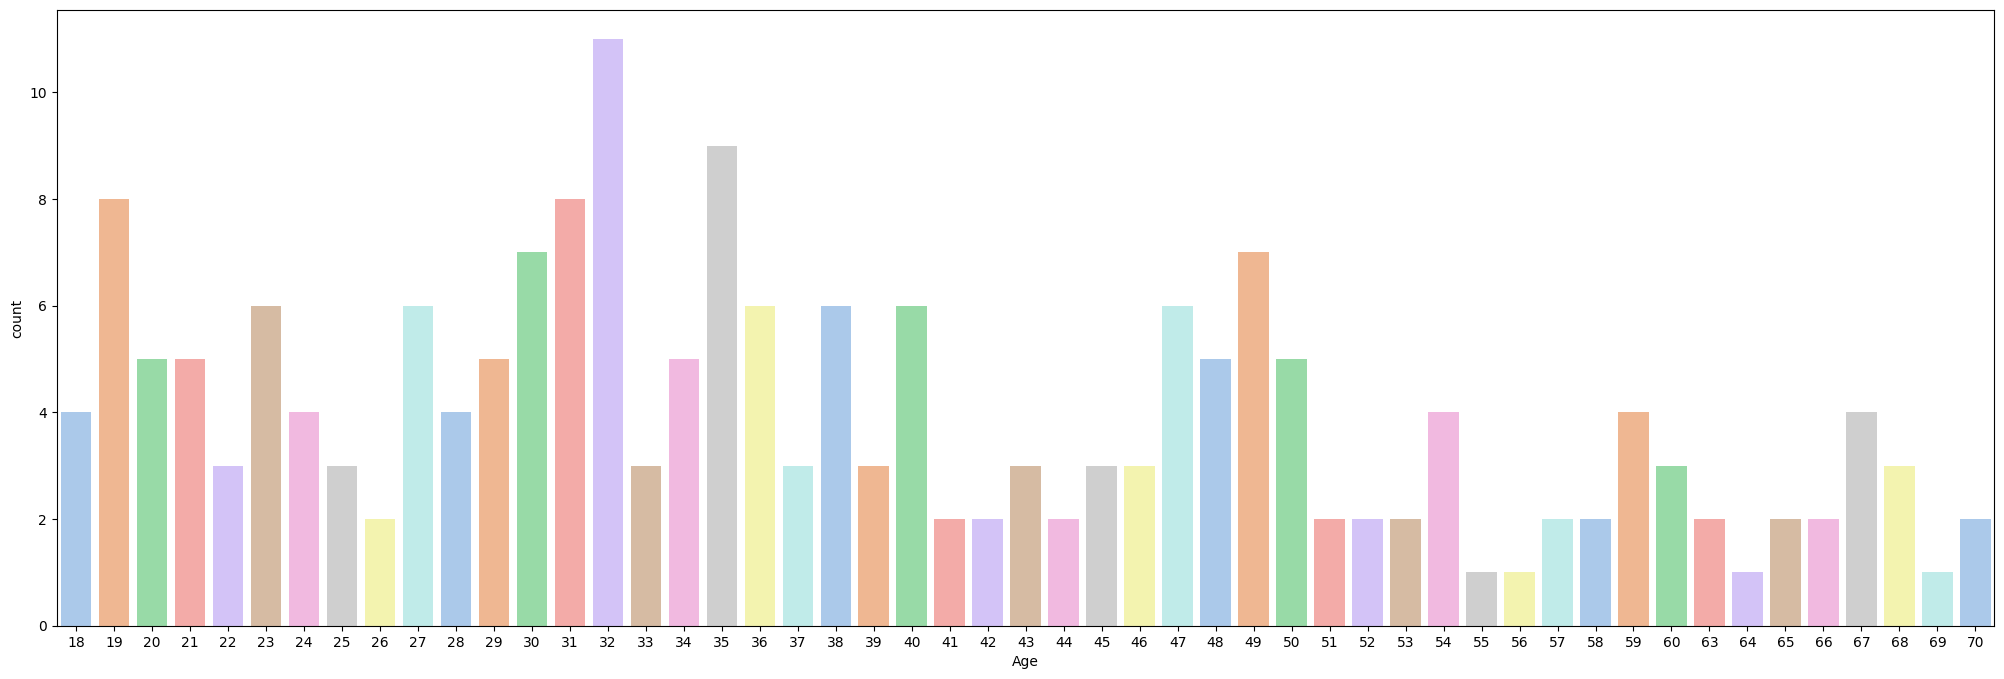

In [98]:
# Visualising the age distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Age",data=df,palette="pastel")
plt.show()

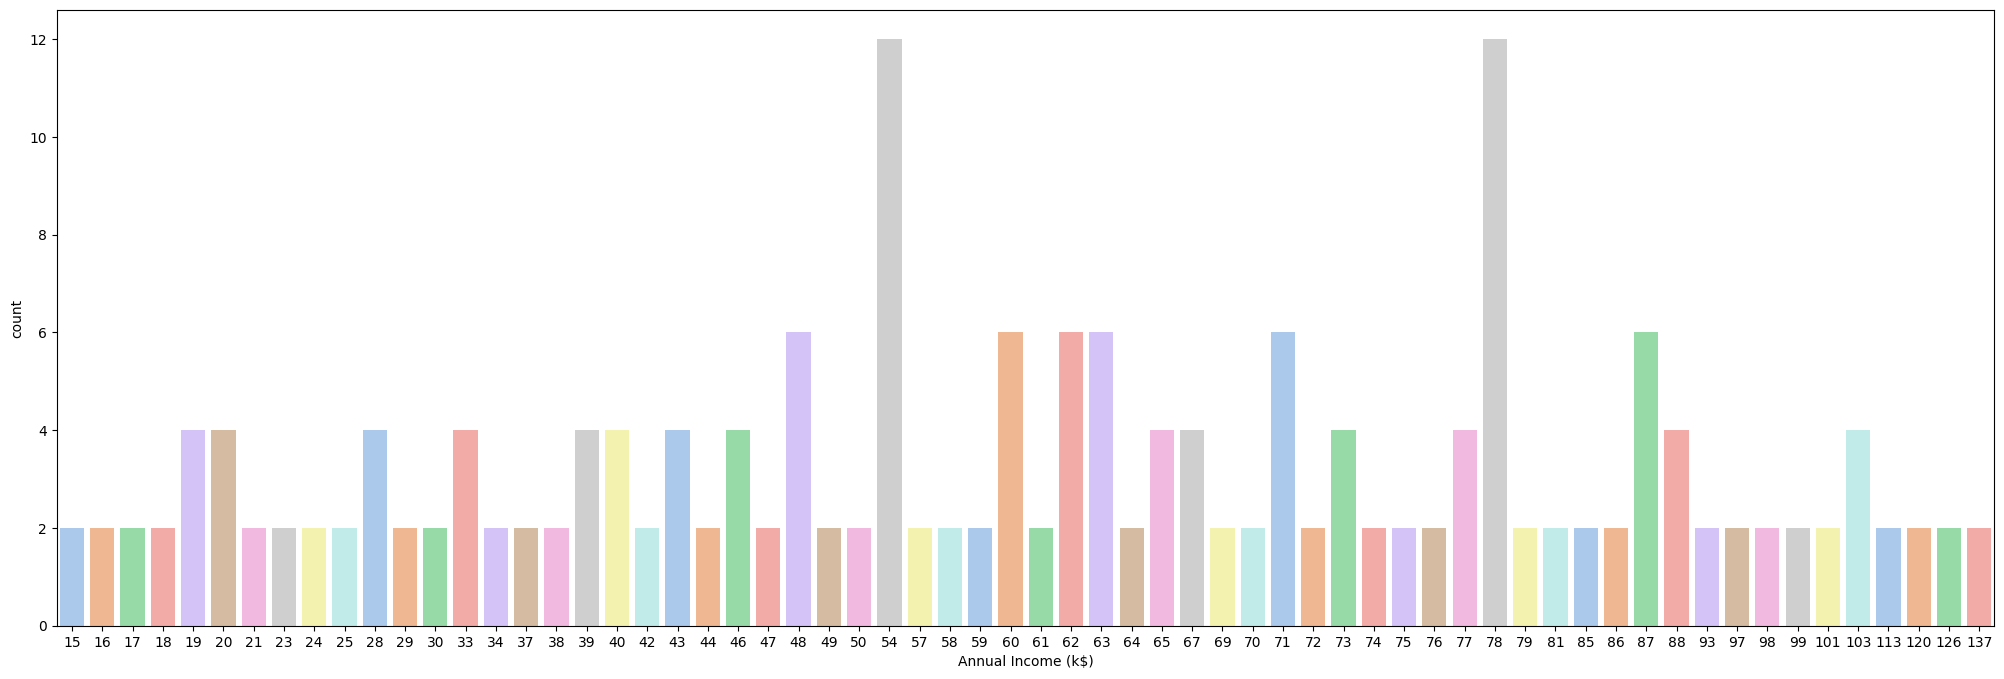

In [99]:
# Visualising the income distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Annual Income (k$)",data=df,palette="pastel")
plt.show()

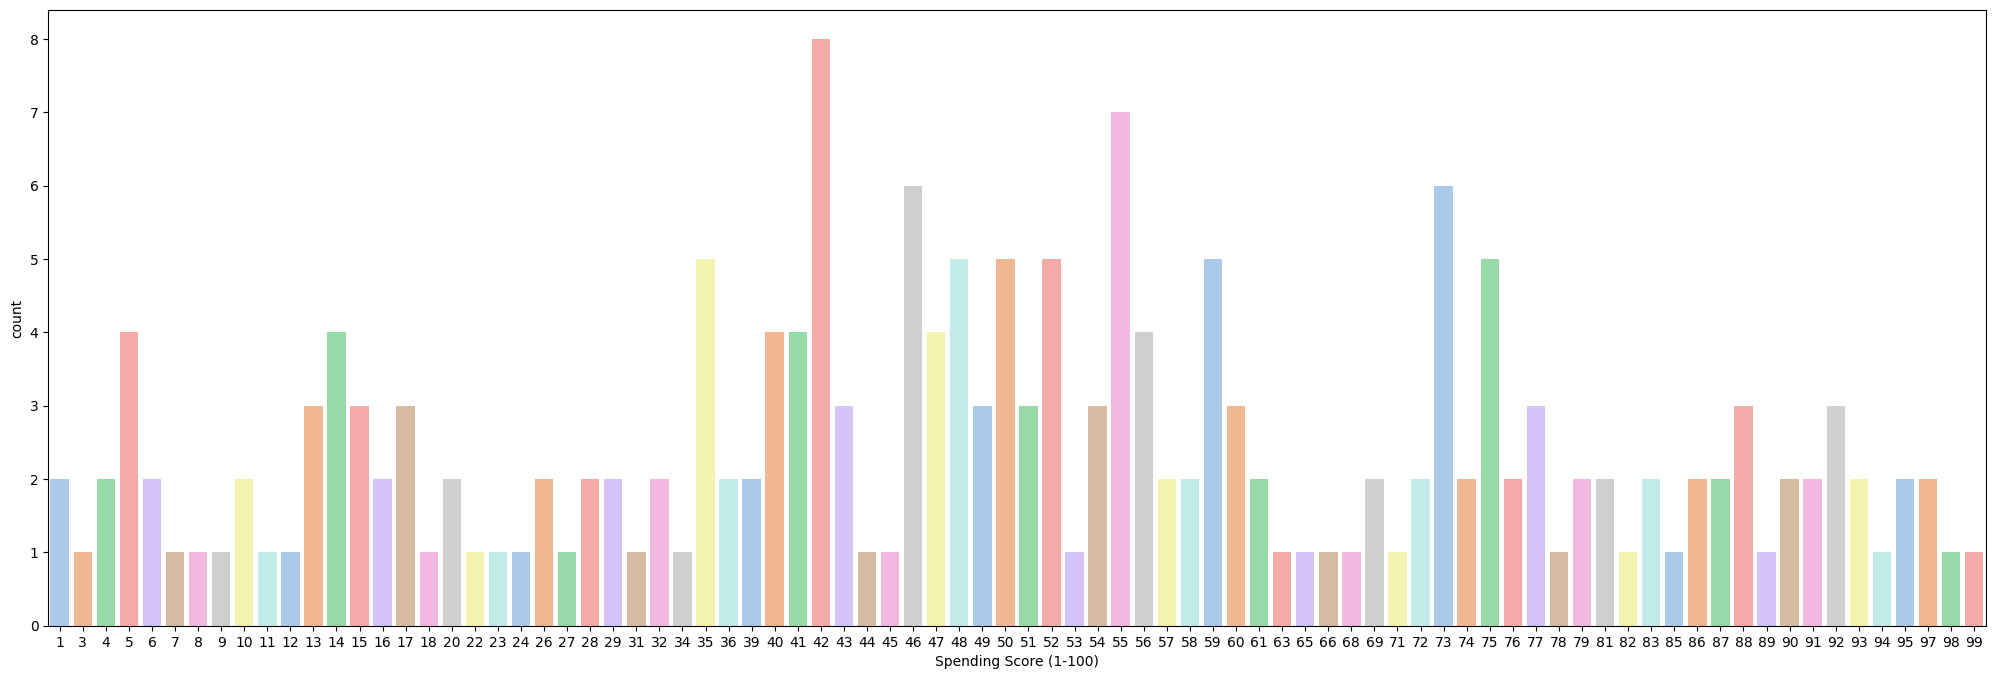

In [100]:
# Visualising the spending score of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Spending Score (1-100)",data=df,palette="pastel")
plt.show()

In [101]:
# Dropping CustomerID column
df.drop(['Gender'], inplace = True, axis = 1) 
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Transformed
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


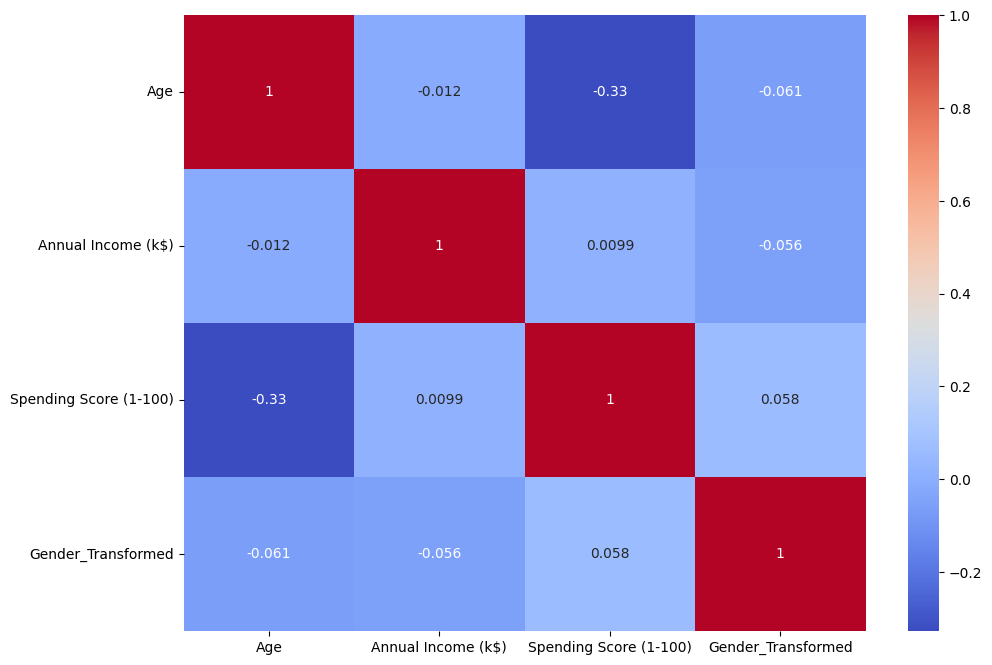

In [102]:
# Finding correaltion between all the parameters in the dataset.
plt.figure(figsize=(11, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

**Gaussian Mixture Modeling**

In [103]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Transformed']
X = df[features]

In [104]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [105]:
gm = GaussianMixture(n_components = 2,n_init = 10,max_iter = 100)
gm.fit(X_scaled) #Train the algorithm

GaussianMixture(n_components=2, n_init=10)

In [107]:
gm.means_ #Where are the clsuter centers

array([[ 0.06866767,  0.06363885, -0.0655555 , -1.12815215],
       [-0.05395317, -0.05000195,  0.05150789,  0.88640526]])

In [108]:
gm.converged_ #Did algorithm converge?

True

In [109]:
gm.n_iter_ #How many iterations did it perform?

2

In [110]:
gm.predict(X_scaled) #Clusters labels

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0])

In [111]:
gm.weights_ #Weights of respective gaussians.

array([0.44, 0.56])

In [123]:
labels = gm.predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = labels

In [127]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Transformed,Cluster
0,19,15,39,0,0
1,21,15,81,0,0
2,20,16,6,1,1
3,23,16,77,1,1
4,31,17,40,1,1


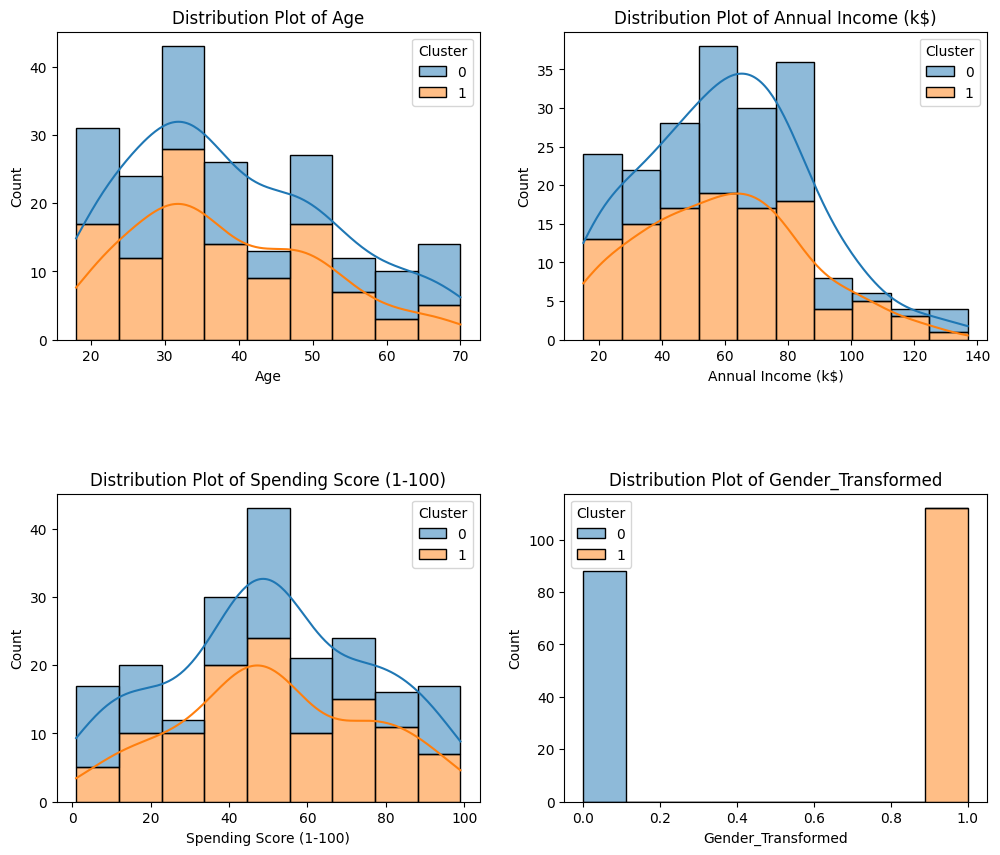

In [125]:
# Features to visualize
features_to_visualize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Transformed', 'Cluster']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# Create distribution plots for each feature based on clusters
for i, feature in enumerate(features_to_visualize[:-1]):
    row, col = divmod(i, 2)
    sns.histplot(data=df, x=feature, hue='Cluster', multiple='stack', kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution Plot of {feature}')

plt.show()